<a href="https://colab.research.google.com/github/mohitpansari7/kMeansImplementation/blob/main/Clustering_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np

In [120]:
players = pd.read_csv('https://raw.githubusercontent.com/mohitpansari7/DataSets/main/players_22.csv')

<ipython-input-120-37bd75a2cbd2>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('https://raw.githubusercontent.com/mohitpansari7/DataSets/main/players_22.csv')


In [121]:
players


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [122]:
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']

In [123]:
players = players.dropna(subset=features)

In [124]:
data = players[features].copy()

In [125]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


Clustering starts

In [126]:
#1. Scaling the data
data =  ( (data - data.min()) / (data.max() - data.min()) ) * 9 + 1

print(data)

print(data.describe())

#this is min max scaling and this preservers the variance in data which is required for clutering better

         overall  potential  value_eur   wage_eur       age
0      10.000000   9.608696   4.618307   9.227468  7.000000
1       9.804348   9.413043   6.543654   7.939914  6.333333
2       9.608696   9.217391   3.087308   7.939914  7.666667
3       9.608696   9.217391   6.984396   7.939914  5.333333
4       9.608696   9.217391   6.822018  10.000000  5.666667
...          ...        ...        ...        ...       ...
19234   1.000000   1.586957   1.002830   1.012876  3.000000
19235   1.000000   2.956522   1.004686   1.000000  2.000000
19236   1.000000   2.173913   1.004222   1.000000  2.666667
19237   1.000000   3.152174   1.004686   1.000000  2.000000
19238   1.000000   3.152174   1.004686   1.000000  2.000000

[19165 rows x 5 columns]
            overall     potential     value_eur      wage_eur           age
count  19165.000000  19165.000000  19165.000000  19165.000000  19165.000000
mean       4.670472      5.319998      1.131826      1.219443      4.063345
std        1.346635      1

In [127]:
#Initialize random centroids

In [128]:
def generate_random_centroids(data, k):
  centroids = []

  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)

  return pd.concat(centroids, axis = 1)

In [129]:
centroids = generate_random_centroids(data, 5)

centroids

<ipython-input-128-6c6c081b1584>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,3.152174,5.500000,5.108696,5.500000,3.543478
potential,6.869565,3.739130,6.673913,7.065217,4.130435
value_eur,1.120207,1.110928,1.059895,1.185158,1.041337
wage_eur,1.347639,1.005150,1.450644,1.012876,1.038627
age,6.000000,4.000000,1.666667,1.666667,4.000000


In [130]:
# assigning each data point to a cluster

def get_labels(data, centroids):
  distances = centroids.apply(lambda x : np.sqrt( ( ( data - x) ** 2).sum(axis = 1)))
  return distances.idxmin(axis = 1)

In [131]:
labels = get_labels(data, centroids)

In [132]:
labels.value_counts()

4    7337
1    5211
2    3586
3    1877
0    1154
Name: count, dtype: int64

In [133]:
def new_centroids(data, label, k):
  return data.groupby(label).apply(lambda x : np.exp(np.log(x).mean() )).T

In [134]:
!pip install ipython

In [135]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [136]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(2)
  transformed_data = pca.fit_transform(data)
  transformed_centroids = pca.transform(centroids.T)

  clear_output(wait = True)

  plt.title(f'Iteration {iteration}')
  plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c = labels)
  plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1])
  plt.show()

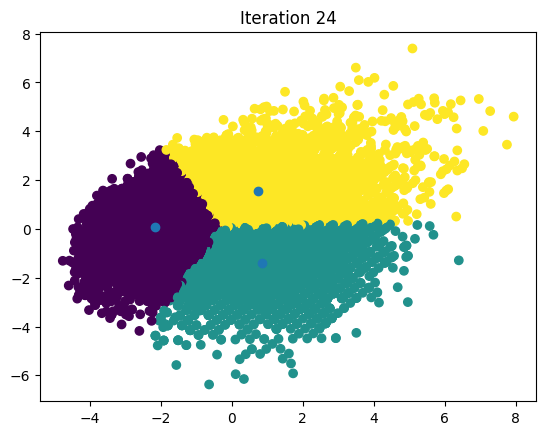

In [137]:
max_iter = 100
k = 3

centroids = generate_random_centroids(data, k)

old_centroids = pd.DataFrame()
iter = 1

while not centroids.equals(old_centroids) and iter <= max_iter:
  old_centroids = centroids
  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iter)
  iter += 1


In [138]:
centroids

,0,1,2
overall,3.205672,4.781960,5.807503
potential,4.930905,4.506813,6.497870
value_eur,1.026655,1.044909,1.285685
wage_eur,1.028564,1.118498,1.420500
age,2.514741,5.467648,3.598215


In [139]:
labels.value_counts()

1    7191
0    6209
2    5765
Name: count, dtype: int64

In [140]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
7025,Sandeiro Leal,68,68,1400000.0,7000.0,21
8028,Narcisso Mau,67,67,1100000.0,4000.0,21
8029,Botelhinonsa,67,67,1100000.0,4000.0,21
8030,Edenildo Lagoas,67,67,1100000.0,3000.0,21
8040,Dener Rolim,67,67,1200000.0,4000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


In [141]:
!pip install scikit-learn

In [142]:
from sklearn.cluster import KMeans

k = 3

kmeans = KMeans(n_clusters = k)
kmeans.fit(data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [143]:
pd.DataFrame(kmeans.cluster_centers_, columns = features).T

,0,1,2
overall,4.808611,3.585462,6.217756
potential,4.513285,5.197933,6.622283
value_eur,1.040434,1.035304,1.411732
wage_eur,1.114046,1.039347,1.652348
age,5.606285,2.707200,4.117123


In [144]:
#compairing our implementation with scikit learns
centroids

,0,1,2
overall,3.205672,4.781960,5.807503
potential,4.930905,4.506813,6.497870
value_eur,1.026655,1.044909,1.285685
wage_eur,1.028564,1.118498,1.420500
age,2.514741,5.467648,3.598215
